# Task 4.10 - Part 1

## Contents
### Importing relevant Libraries
### Defining Path variable
### Importing dataframes
### Checking the imported dataframe
### Removing any columns than might raise privacy concerns
### Creating a region flag
### Comparing spending habits among regions
### Creating exclusion flags for low-activity customers
### Creating new dataframes including only "Low activity customer" and "Normal activity customer" flags
### Creating goods flags based on the products in the deartments
### Creating customer profiles
### Visualizing the distribution of the customer profiles
### Exporting final dataframe

## Importing relevant libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Defining the path variable

In [2]:
# defining the path variable by assigning the relevant folder path
path = r"C:\Users\khand\Desktop\Careerfoundry\Data Immersion\Achievement - 4\04-2022 Instacart Basket Analysis"

## Importing dataframes

In [3]:
# importing the most updated dataframe as df_prepared
df_prepared = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'ords_prods_cust_merged_v2.pkl'))

## Checking the imported dataframe

In [4]:
# checking the names of columns, datatypes and the number of rows and columns in the dataframe
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   order_id                          object  
 1   user_id                           object  
 2   order_number                      int64   
 3   order_day_of_week                 int32   
 4   order_time_24h_format             int32   
 5   days_since_prior_order            float64 
 6   product_id                        object  
 7   add_to_cart_order                 int64   
 8   reordered                         int64   
 9   merge_flag_1                      category
 10  product_name                      object  
 11  aisle_id                          object  
 12  department_id                     object  
 13  prices                            float64 
 14  merge_flag_2                      category
 15  price_range                       object  
 16  busiest_day     

In [5]:
# checking the head of the dataframe
df_prepared.head(30)

,order_id,user_id,order_number,order_day_of_week,order_time_24h_format,days_since_prior_order,product_id,add_to_cart_order,reordered,merge_flag_1,...,first_name,surname,gender,state,age,date_joined,number_of_dependents,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,6,2,7,19.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,7,1,9,20.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,8,1,14,14.0,196,2,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,9,1,16,0.0,196,4,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## Removing any columns than might raise privacy concerns

In [4]:
# removing the "first_name" and "surname" column to address privacy concerns
df_prepared_privacy_checked = df_prepared.drop(columns = ['first_name', 'surname'])

### Checking the updated dataframe

In [7]:
# checking the column names, data types, number of columns and rows in the updated dataframe
df_prepared_privacy_checked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   order_id                          object  
 1   user_id                           object  
 2   order_number                      int64   
 3   order_day_of_week                 int32   
 4   order_time_24h_format             int32   
 5   days_since_prior_order            float64 
 6   product_id                        object  
 7   add_to_cart_order                 int64   
 8   reordered                         int64   
 9   merge_flag_1                      category
 10  product_name                      object  
 11  aisle_id                          object  
 12  department_id                     object  
 13  prices                            float64 
 14  merge_flag_2                      category
 15  price_range                       object  
 16  busiest_day     

## Creating a region flag

### Creating lists of states based on region

In [5]:
# creating list of states in 'northeast' region
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [6]:
# creating list of states in 'midwest' region
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [7]:
# creating list of states in 'south' region
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [8]:
# creating list of states in 'west' region
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

### Creating a new "region" column and assigning the region flags

In [9]:
# creating region flag for "West" region
df_prepared_privacy_checked.loc[df_prepared_privacy_checked['state'].isin(west), 'region'] = 'West'

In [10]:
# creating region flag for "South" region
df_prepared_privacy_checked.loc[df_prepared_privacy_checked['state'].isin(south), 'region'] = 'South'

In [11]:
# creating region flag for 'Midwest' region
df_prepared_privacy_checked.loc[df_prepared_privacy_checked['state'].isin(midwest), 'region'] = 'Midwest'

In [12]:
# creating region flag for 'Northeast' region
df_prepared_privacy_checked.loc[df_prepared_privacy_checked['state'].isin(northeast), 'region'] = 'Northeast'

### Checking the updated dataframe with "region" flag

In [16]:
# checking the head of the updated dataframe
df_prepared_privacy_checked.head(30)

,order_id,user_id,order_number,order_day_of_week,order_time_24h_format,days_since_prior_order,product_id,add_to_cart_order,reordered,merge_flag_1,...,frequency_flag,gender,state,age,date_joined,number_of_dependents,family_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
5,3367565,1,6,2,7,19.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
6,550135,1,7,1,9,20.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
7,3108588,1,8,1,14,14.0,196,2,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
8,2295261,1,9,1,16,0.0,196,4,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
9,2550362,1,10,4,8,30.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [17]:
# checking frequency distribution of the "region" flag column
df_prepared_privacy_checked['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

## Comparing spending habits among regions

In [17]:
# comparing spending habits among regions grouping by "region"  column and aggregating "prices" column
df_prepared_privacy_checked.groupby('region').agg({'prices' : ['mean', 'median', 'max', 'min', 'sum', 'count']})


prices                                            
                mean median      max  min          sum     count
region                                                          
Midwest    12.715483    7.4  99999.0  1.0   96603658.7   7597325
Northeast  11.554997    7.4  99999.0  1.0   66126199.8   5722736
South      12.195577    7.4  99999.0  1.0  131613265.4  10791885
West       11.319834    7.4  99999.0  1.0   93874398.7   8292913

### Removing outlier values in the "prices" column

In [13]:
# removing the outlier values in the "prices" column
df_prepared_privacy_checked.loc[df_prepared_privacy_checked['prices']>=1000, 'prices'] = np.nan

### Re-trying the comparison of spending habits among regions

In [16]:
# re-trying the comparison of spending habits among regions
df_prepared_privacy_checked.groupby('region').agg({'prices' : ['mean', 'median', 'max', 'min', 'sum', 'count']})

prices                                        
               mean median   max  min         sum     count
region                                                     
Midwest    7.792584    7.4  25.0  1.0  59192977.7   7596065
Northeast  7.782409    7.4  25.0  1.0  44530105.8   5721892
South      7.794918    7.4  25.0  1.0  84107910.4  10790096
West       7.790355    7.4  25.0  1.0  64595126.7   8291679

#### There is no major difference between the spending habits among the different regions

## Creating exclusion flags for low-activity customers

In [14]:
# creating flag based on condition 1: customers with less than 5 orders
df_prepared_privacy_checked.loc[df_prepared_privacy_checked['max_orders'] < 5, 'customer_activity_level'] = 'Low activity customer'

In [15]:
# creating flag based on condition 2: customers with more than or equal to 5 orders
df_prepared_privacy_checked.loc[df_prepared_privacy_checked['max_orders'] >= 5, 'customer_activity_level'] = 'Normal activity customer'

### Checking the "customer_activity_level" flags

In [22]:
# checking the frequency distribution of the "customer_activity_level"
df_prepared_privacy_checked['customer_activity_level'].value_counts(dropna = False)

Normal activity customer    30964564
Low activity customer        1440295
Name: customer_activity_level, dtype: int64

## Creating new dataframes including only "Low activity customer" and "Normal activity customer" flags

In [16]:
# creating a dataframe with only "Normal activity customer" flags
df_normal_activity = df_prepared_privacy_checked.loc[df_prepared_privacy_checked['customer_activity_level'] == 'Normal activity customer']

In [24]:
# creating a dataframe with only "Low activity customer" flags
df_low_activity = df_prepared_privacy_checked.loc[df_prepared_privacy_checked['customer_activity_level'] == 'Low activity customer']

### Checking the newly created dataframes

In [25]:
# checkign the number of rows and columns in the "df_normal_activity"
df_normal_activity.shape

(30964564, 35)

In [26]:
# checkign the number of rows and columns in the "df_low_activity"
df_low_activity.shape

(1440295, 35)

### Exporting the "df_low_activity" in pickle format

In [28]:
# exporting the "df_low_activity" in pickle format
df_low_activity.to_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'orders_from_low_activity_customers.pkl'))

## Creating goods flags based on the products in the deartments

### Checkign the meanings of the values in the "department_id" column

In [22]:
# Importing the departments dataframe
df_departments = pd.read_csv(os.path.join(path, '2. Data', 'Original Data', 'departments.csv'), index_col = False)

In [23]:
# checking the departments
df_departments

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [24]:
# transposing the dataframe
df_departments.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


### Creating "name_of_goods" flag

In [17]:
# creating a list of "name_of_goods" based on the "department_id" column
goods = []
for value in df_normal_activity['department_id'] : 
    if value == '1' :
        goods.append('Frozen')
    elif value == '2' :
        goods.append('Other')
    elif value == '3' :
        goods.append('Bakery')
    elif value == '4' :
        goods.append('Produce')
    elif value == '5' :
        goods.append('Alchohol')
    elif value == '6' :
        goods.append('International')
    elif value == '7' :
        goods.append('Beverages')
    elif value == '8' :
        goods.append('Pets')
    elif value == '9' :
        goods.append('Dry goods & pasta')
    elif value == '10' :
        goods.append('Bulk')
    elif value == '11' :
        goods.append('Personal care')
    elif value == '12' :
        goods.append('Meat & seafood')
    elif value == '13' : 
        goods.append('Pantry')
    elif value == '14' :
        goods.append('Breakfast')
    elif value == '15' :
        goods.append('Canned goods')
    elif value == '16' :
        goods.append('Dairy & eggs')
    elif value == '17' :
        goods.append('Household')
    elif value == '18' :
        goods.append('Babies')
    elif value == '19' :
        goods.append('Snacks')
    elif value == '20' :
        goods.append('Deli')
    elif value == '21' :
        goods.append('Missing')
    else : 
        goods.append('Unknown')

In [18]:
# creating a new "name_of_goods" column assigning the values of the list "goods"
df_normal_activity['name_of_goods'] = goods

C:\Users\khand\AppData\Local\Temp/ipykernel_19296/4078734801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['name_of_goods'] = goods


In [32]:
# checking the frequency distribution of the values in "name_of_goods" column
df_normal_activity['name_of_goods'].value_counts(dropna = False)

Produce              9079273
Dairy & eggs         5177182
Snacks               2766406
Beverages            2571901
Frozen               2121731
Pantry               1782705
Bakery               1120828
Canned goods         1012074
Deli                 1003834
Dry goods & pasta     822136
Household             699857
Meat & seafood        674781
Breakfast             670850
Personal care         424306
Babies                410392
International         255991
Alchohol              144627
Pets                   93060
Missing                64768
Other                  34411
Bulk                   33451
Name: name_of_goods, dtype: int64

## Creating customer profiles

### Creating age group flag based on the age column

In [19]:
# creating "age_group" flag with condition 1: age = 13-19
df_normal_activity.loc[(df_normal_activity['age']>=13) & (df_normal_activity['age']<=19), 'age_group'] = 'Teenager'

C:\Users\khand\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\khand\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [20]:
# creating "age_group" flag with condition 2: age = 20-39
df_normal_activity.loc[(df_normal_activity['age']>=20) & (df_normal_activity['age']<=39), 'age_group'] = 'Adult'

In [21]:
# creating "age_group" flag with condition 3: age = 40-59
df_normal_activity.loc[(df_normal_activity['age']>=40) & (df_normal_activity['age']<=59), 'age_group'] = 'Middle age adult'

In [22]:
# creating "age_group" flag with condition 4: age >= 60
df_normal_activity.loc[df_normal_activity['age']>=60, 'age_group'] = 'Senior adult'

#### Checking the "age_goup" flag

In [37]:
# checking the frequency distribution of "age_group" flag
df_normal_activity['age_group'].value_counts(dropna = False)

Senior adult        10574504
Middle age adult     9724950
Adult                9690576
Teenager              974534
Name: age_group, dtype: int64

### Creating a flag based on purchase of "babies" products

In [23]:
# filtering the records with "department_id" = 18 (babies)
df_babies = df_normal_activity[df_normal_activity['department_id'] == '18']

In [39]:
# checking the head of the newly created dataframe
df_babies.head()

,order_id,user_id,order_number,order_day_of_week,order_time_24h_format,days_since_prior_order,product_id,add_to_cart_order,reordered,merge_flag_1,...,age,date_joined,number_of_dependents,family_status,income,_merge,region,customer_activity_level,name_of_goods,age_group
6634374,541735,720,4,1,8,6.0,45045,10,0,both,...,71,6/5/2017,0,divorced/widowed,133854,both,West,Normal activity customer,Babies,Senior adult
6634376,1207316,1022,69,1,15,4.0,45045,11,0,both,...,43,7/17/2017,3,married,133279,both,West,Normal activity customer,Babies,Middle age adult
6634377,2133535,1022,74,6,19,3.0,45045,4,1,both,...,43,7/17/2017,3,married,133279,both,West,Normal activity customer,Babies,Middle age adult
6634378,2311330,1890,2,6,10,7.0,45045,17,0,both,...,53,7/24/2018,3,married,108183,both,West,Normal activity customer,Babies,Middle age adult
6634379,1151663,2002,11,2,21,8.0,45045,10,0,both,...,49,9/14/2017,1,married,169627,both,West,Normal activity customer,Babies,Middle age adult


In [24]:
# creating a list of unique user_ids from the records having "babies" products
parents = df_babies['user_id'].unique()

In [25]:
# checking the list
parents

array(['720', '1022', '1890', ..., '118232', '132967', '180580'],
      dtype=object)

In [25]:
# flagging users who have bablies based on purchase of "babies" products
df_normal_activity.loc[df_normal_activity['user_id'].isin(parents), 'babies_flag'] = 'Buys babies products'

In [26]:
# flagging users who donot have bablies based on purchase of "babies" products
df_normal_activity.loc[df_normal_activity['user_id'].isin(parents) == False, 'babies_flag'] = 'Does not buy babies products'

In [28]:
# checking the "babies" flag
df_normal_activity['babies_flag'].value_counts(dropna = False)

Does not buy babies products    21154311
Buys babies products             9810253
Name: babies_flag, dtype: int64

In [45]:
# checkign the updated dataframe
df_normal_activity.head()

,order_id,user_id,order_number,order_day_of_week,order_time_24h_format,days_since_prior_order,product_id,add_to_cart_order,reordered,merge_flag_1,...,date_joined,number_of_dependents,family_status,income,_merge,region,customer_activity_level,name_of_goods,age_group,babies_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,2/17/2019,3,married,40423,both,South,Normal activity customer,Beverages,Adult,Does not buy babies products
1,2398795,1,2,3,7,15.0,196,1,1,both,...,2/17/2019,3,married,40423,both,South,Normal activity customer,Beverages,Adult,Does not buy babies products
2,473747,1,3,3,12,21.0,196,1,1,both,...,2/17/2019,3,married,40423,both,South,Normal activity customer,Beverages,Adult,Does not buy babies products
3,2254736,1,4,4,7,29.0,196,1,1,both,...,2/17/2019,3,married,40423,both,South,Normal activity customer,Beverages,Adult,Does not buy babies products
4,431534,1,5,4,15,28.0,196,1,1,both,...,2/17/2019,3,married,40423,both,South,Normal activity customer,Beverages,Adult,Does not buy babies products


### Creating a "dependent_flag"

In [27]:
# creating a dependent flag based on the "number_of_dependents" column. Condition 1: "number_of_dependents" = 0
df_normal_activity.loc[df_normal_activity['number_of_dependents'] == 0, 'dependent_flag'] = 'Does not have dependents'

In [28]:
# creating a dependent flag based on the "number_of_dependents" column. Condition 2: "number_of_dependents" > 0
df_normal_activity.loc[df_normal_activity['number_of_dependents'] > 0, 'dependent_flag'] = 'Has dependents'

### Creating an "income_range" flag based on "income" column

In [48]:
# descriptive analysis of the "income" column
df_normal_activity['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [49]:
# checking the frequency distribution of the "income" column
df_normal_activity['income'].value_counts(dropna = False).sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 96069, dtype: int64

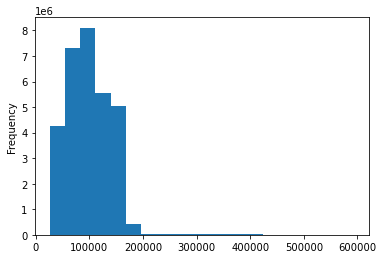

In [50]:
# creating histogram to identify outliers
histogram_income = df_normal_activity['income'].plot.hist(bins = 20)

In [29]:
# creating 'income_range' flag based on "income" column
df_normal_activity.loc[(df_normal_activity['income'] >= 25000) & (df_normal_activity['income'] < 50000), 'income_range'] = '25000-50000'

In [30]:
# creating 'income_range' flag based on "income" column
df_normal_activity.loc[(df_normal_activity['income'] >= 50000) & (df_normal_activity['income'] < 75000), 'income_range'] = '50000-75000'

In [31]:
# creating 'income_range' flag based on "income" column
df_normal_activity.loc[(df_normal_activity['income'] >= 75000) & (df_normal_activity['income'] < 100000), 'income_range'] = '75000-100000'

In [32]:
# creating 'income_range' flag based on "income" column
df_normal_activity.loc[(df_normal_activity['income'] >= 100000) & (df_normal_activity['income'] < 125000), 'income_range'] = '100000-125000'

In [33]:
# creating 'income_range' flag based on "income" column
df_normal_activity.loc[(df_normal_activity['income'] >= 125000) & (df_normal_activity['income'] < 150000), 'income_range'] = '125000-150000'

In [34]:
# creating 'income_range' flag based on "income" column
df_normal_activity.loc[(df_normal_activity['income'] >= 150000) & (df_normal_activity['income'] < 175000), 'income_range'] = '150000-175000'

In [35]:
# creating 'income_range' flag based on "income" column
df_normal_activity.loc[df_normal_activity['income'] >= 175000, 'income_range'] = '175000+'

In [58]:
# checking the income_range flag
df_normal_activity['income_range'].value_counts(dropna = False)

75000-100000     6850482
50000-75000      6544126
100000-125000    5929358
125000-150000    4382769
150000-175000    3592939
25000-50000      3362554
175000+           302336
Name: income_range, dtype: int64

### Creating a combined customer profile flag combining the  "age_group", "babies_flag" and "dependant_flag"

In [36]:
# creating the customer profile flag. condition 1 : no dependents
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Does not have dependents') & (df_normal_activity['age_group'] == 'Senior adult'), 'combined_customer_profile'] = 'Senior adult with no dependent'

In [37]:
# creating the customer profile flag. condition 1 : no dependents
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Does not have dependents') & (df_normal_activity['age_group'] == 'Middle age adult'), 'combined_customer_profile'] = 'Middle age adult with no dependent'

In [38]:
# creating the customer profile flag. condition 1 : no dependents
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Does not have dependents') & (df_normal_activity['age_group'] == 'Adult'), 'combined_customer_profile'] = 'Adult with no dependent'

In [39]:
# creating the customer profile flag. condition 1 : no dependents
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Does not have dependents') & (df_normal_activity['age_group'] == 'Teenager'), 'combined_customer_profile'] = 'Teenager with no dependent'

In [40]:
# creating the customer profile flag. condition 2 : has dependents and buys babies products
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Has dependents') & (df_normal_activity['age_group'] == 'Teenager') & (df_normal_activity['babies_flag'] == 'Buys babies products'), 'combined_customer_profile'] = 'Teenager parent with baby'

In [41]:
# creating the customer profile flag. condition 2 : has dependents and buys babies products
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Has dependents') & (df_normal_activity['age_group'] == 'Adult') & (df_normal_activity['babies_flag'] == 'Buys babies products'), 'combined_customer_profile'] = 'Adult parent with baby'

In [42]:
# creating the customer profile flag. condition 2 : has dependents and buys babies products
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Has dependents') & (df_normal_activity['age_group'] == 'Middle age adult') & (df_normal_activity['babies_flag'] == 'Buys babies products'), 'combined_customer_profile'] = 'Middle age adult parent with baby'

In [43]:
# creating the customer profile flag. condition 2 : has dependents and buys babies products
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Has dependents') & (df_normal_activity['age_group'] == 'Senior adult') & (df_normal_activity['babies_flag'] == 'Buys babies products'), 'combined_customer_profile'] = 'Senior adult with baby'

In [44]:
# creating the customer profile flag. condition 2 : has dependents and buys babies products
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Has dependents') & (df_normal_activity['age_group'] == 'Teenager') & (df_normal_activity['babies_flag'] == 'Does not buy babies products'), 'combined_customer_profile'] = 'Teenager with dependent'

In [45]:
# creating the customer profile flag. condition 2 : has dependents and buys babies products
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Has dependents') & (df_normal_activity['age_group'] == 'Adult') & (df_normal_activity['babies_flag'] == 'Does not buy babies products'), 'combined_customer_profile'] = 'Adult with dependent'

In [46]:
# creating the customer profile flag. condition 2 : has dependents and buys babies products
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Has dependents') & (df_normal_activity['age_group'] == 'Middle age adult') & (df_normal_activity['babies_flag'] == 'Does not buy babies products'), 'combined_customer_profile'] = 'Middle age adult with dependent'

In [47]:
# creating the customer profile flag. condition 2 : has dependents and buys babies products
df_normal_activity.loc[(df_normal_activity['dependent_flag'] == 'Has dependents') & (df_normal_activity['age_group'] == 'Senior adult') & (df_normal_activity['babies_flag'] == 'Does not buy babies products'), 'combined_customer_profile'] = 'Senior adult with dependent'

### Checkign the "combined_customer_profile" flag

In [71]:
# checking the frequency distrbution of "customer_profile" column
df_normal_activity['combined_customer_profile'].value_counts(dropna = False)

Senior adult with dependent           5412936
Middle age adult with dependent       4972727
Adult with dependent                  4971099
Senior adult with no dependent        2645271
Senior adult with baby                2516297
Adult with no dependent               2435739
Middle age adult with no dependent    2433835
Middle age adult parent with baby     2318388
Adult parent with baby                2283738
Teenager with dependent                513959
Teenager parent with baby              235739
Teenager with no dependent             224836
Name: combined_customer_profile, dtype: int64

### Creating customer profiles based on most common period of day by user

In [48]:
# creating a new column indicating "preferred_period" based on the period of the day in which the customer places most of the orders
df_normal_activity['preferred_period'] = df_normal_activity.groupby(['user_id'])['busiest_period_of_the_day'].transform(lambda x : x.mode()[0])

C:\Users\khand\AppData\Local\Temp/ipykernel_19296/3789877167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['preferred_period'] = df_normal_activity.groupby(['user_id'])['busiest_period_of_the_day'].transform(lambda x : x.mode()[0])


### Checking the "preferred_period" flag

In [73]:
# checking the frequency distribution of "preferred_period" flag
df_normal_activity['preferred_period'].value_counts(dropna = False)

Most orders       25191902
Average orders     5534669
Fewest orders       237993
Name: preferred_period, dtype: int64

### Creating a "preferred_day" flag based on most common order day by user

In [49]:
# creating a list based on the values in the "order_day_of_week" column
day = []
for value in df_normal_activity['order_day_of_week'] :
    if value == 0 :
        day.append('Saturday')
    elif value == 1 :
        day.append('Sunday')
    elif value == 2 :
        day.append('Monday')
    elif value == 3 :
        day.append('Tuesday')
    elif value == 4 :
        day.append('Wednesday')
    elif value == 5 :
        day.append('Thursday')
    elif value == 6 :
        day.append('Friday')
    else : day.append('Unknown')

In [50]:
# assigning the value of the "day" list to the newly created "order_day" flag
df_normal_activity['order_day'] = day

C:\Users\khand\AppData\Local\Temp/ipykernel_19296/737660994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['order_day'] = day


### Checking the "order_day" flag

In [76]:
# checking the "orer_day" flag
df_normal_activity['order_day'].value_counts(dropna = False)

Saturday     5908610
Sunday       5411686
Friday       4291304
Thursday     4033729
Monday       4024706
Tuesday      3669535
Wednesday    3624994
Name: order_day, dtype: int64

### Creating a new flag based on the most common "order_day" by user

In [51]:
# creating a new "preferred_day" flag with most common "order_day" by user
df_normal_activity['preferred_day'] = df_normal_activity.groupby(['user_id'])['order_day'].transform(lambda x : x.mode()[0])

C:\Users\khand\AppData\Local\Temp/ipykernel_19296/192747010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['preferred_day'] = df_normal_activity.groupby(['user_id'])['order_day'].transform(lambda x : x.mode()[0])


### Checking the "preferred_day" flag

In [60]:
# checking the frequency distribution of the "preferred_day" column
df_normal_activity['preferred_day'].value_counts(dropna = False)

Saturday     8130187
Sunday       6581902
Friday       4494898
Thursday     3475206
Monday       3167943
Tuesday      2594541
Wednesday    2519887
Name: preferred_day, dtype: int64

## Visualizing the distribution of the customer profiles

In [61]:
# checking the names of columns, data types and number of rows and columns of the updated dataframe
df_normal_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404858
Data columns (total 44 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   order_id                          object  
 1   user_id                           object  
 2   order_number                      int64   
 3   order_day_of_week                 int32   
 4   order_time_24h_format             int32   
 5   days_since_prior_order            float64 
 6   product_id                        object  
 7   add_to_cart_order                 int64   
 8   reordered                         int64   
 9   merge_flag_1                      category
 10  product_name                      object  
 11  aisle_id                          object  
 12  department_id                     object  
 13  prices                            float64 
 14  merge_flag_2                      category
 15  price_range                       object  
 16  busiest_day     

### Visualising distribution of "name_of_goods" flags

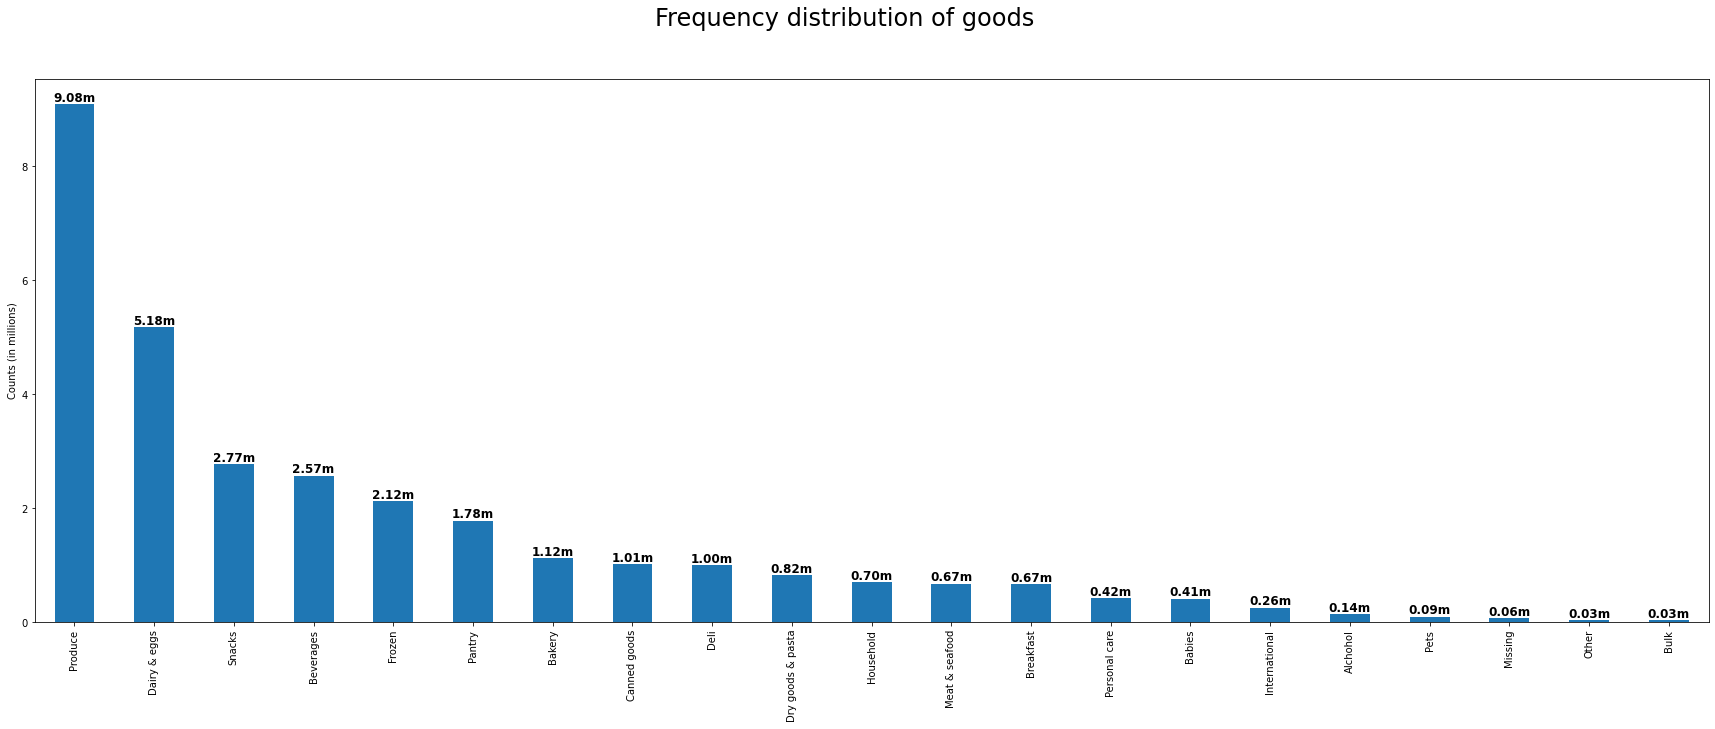

In [62]:
# visualizing frequency distribution of "name_of_goods" column
bar_goods = df_normal_activity['name_of_goods'].value_counts(dropna = False).apply(lambda x : x/1000000).plot(kind = 'bar', ylabel = 'Counts (in millions)', figsize = (20,10))
for c in bar_goods.containers :
    plt.bar_label(c, fmt = '%0.2fm', fontsize = 12, fontweight = 'bold')
plt.gcf().suptitle('Frequency distribution of goods', fontsize = 24)
plt.rcParams.update({'font.size': 18})
plt.tight_layout()
plt.subplots_adjust(bottom = 0.2)

In [74]:
# exporting visualization
bar_goods.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 bar_goods_distribution.png'))

### Visualising distribution of "age_group" flag

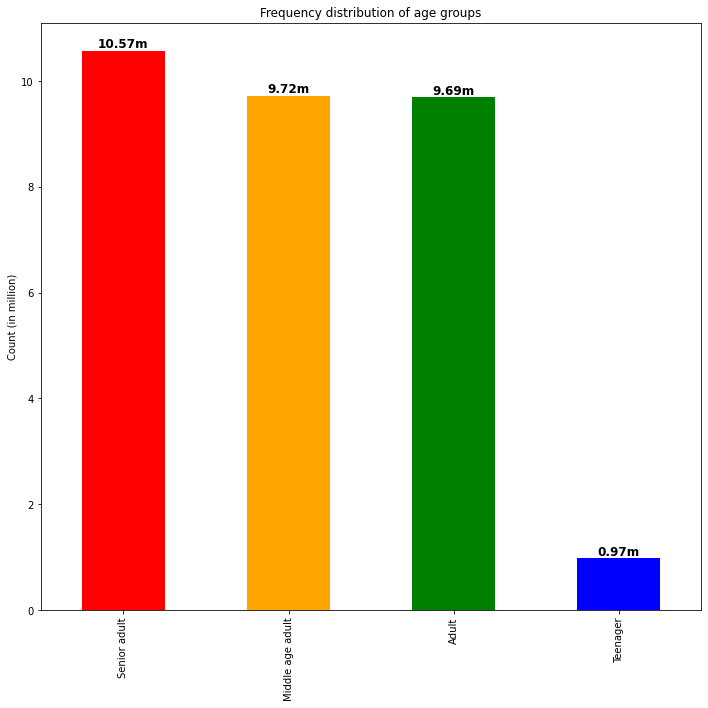

In [52]:
# visualizing the frequency distribution of "age_group" flag
bar_age_group = df_normal_activity['age_group'].value_counts(dropna = False).apply(lambda x : x/1000000).plot.bar(color = ['red', 'orange', 'green', 'blue'], title = 'Frequency distribution of age groups', ylabel = 'Count (in million)', figsize = (10,10))
for c in bar_age_group.containers :
    plt.bar_label(c, fmt = '%0.2fm', fontsize = 12, fontweight = 'bold')
    plt.rcParams.update({'font.size': 12})
plt.tight_layout()

In [53]:
# exporting visualization
bar_age_group.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 bar_age_group_distribution.png'))

### Visualizing the distribution of "babies_flag"

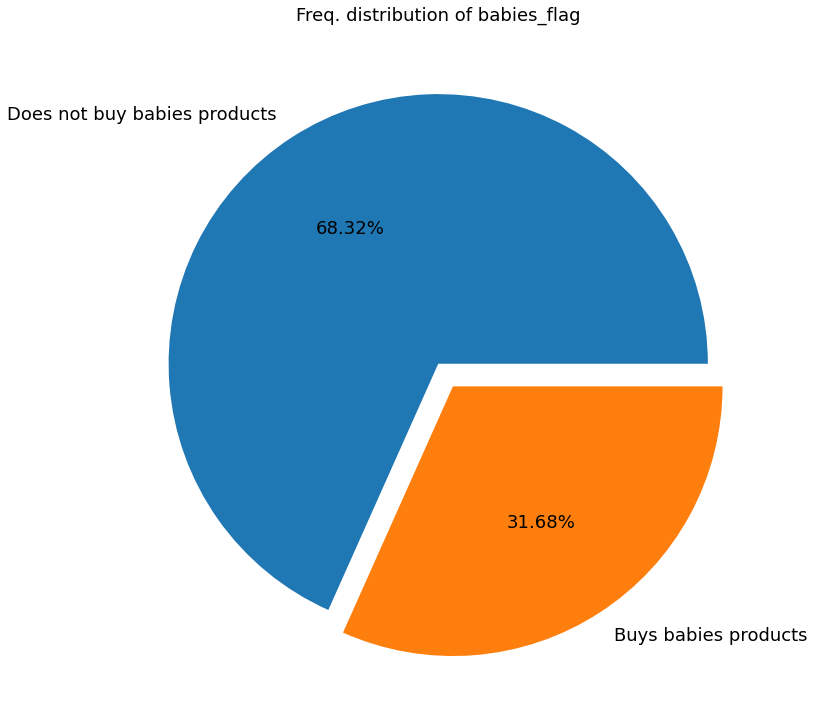

In [68]:
pie_babies = df_normal_activity['babies_flag'].value_counts(dropna = False, normalize = True).plot.pie(ylabel = '', autopct = '%0.2f%%', explode = (0.0,0.1), figsize = (14,10), fontsize = 18)
plt.title('Freq. distribution of babies_flag', fontsize = 18) 
plt.tight_layout()

In [69]:
# exporting visualization
pie_babies.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 pie_babies_distribution.png'))

### Visualising distribution of "dependent_flag"

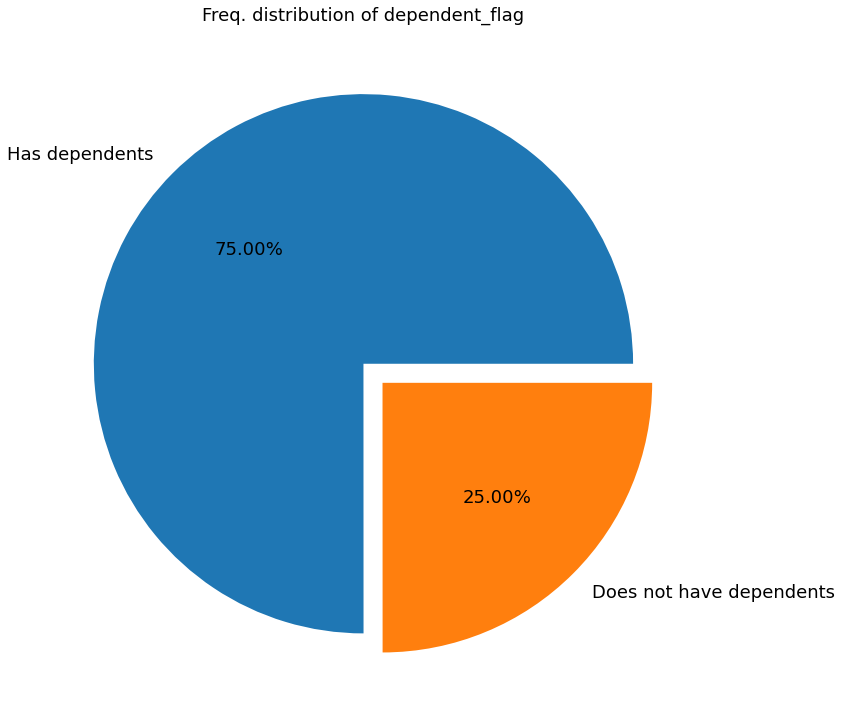

In [70]:
# visualising the frequency distribution of "dependent_flag" column
pie_dependent = df_normal_activity['dependent_flag'].value_counts(dropna = False, normalize = True ).plot.pie(ylabel = '', autopct = '%0.2f%%', explode = (0.0,0.1), figsize = (14,10), fontsize = 18)
plt.title('Freq. distribution of dependent_flag', fontsize = 18) 
plt.tight_layout()

In [71]:
# exporting visualization
pie_dependent.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 pie_dependents_distribution.png'))

### Visualising distribution of "income_range" column

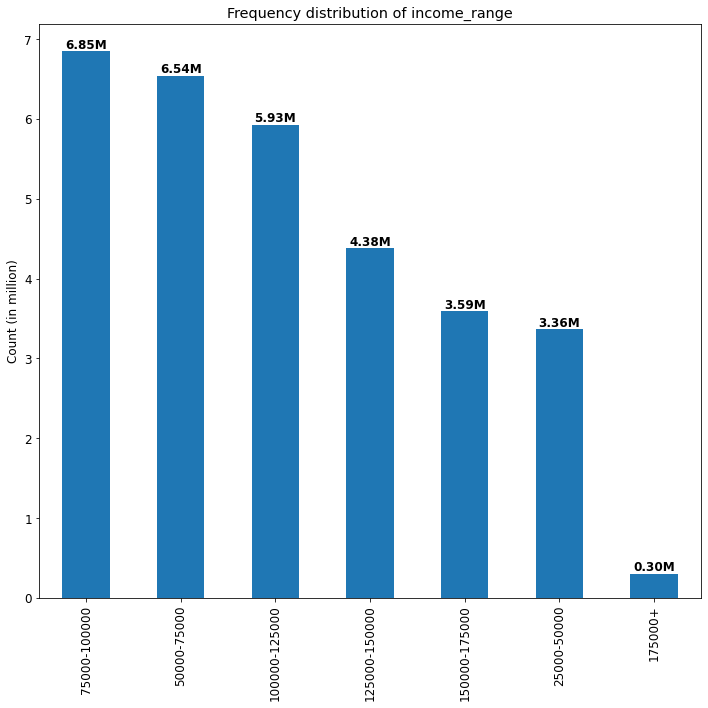

In [54]:
# visualizing the distribution of "income_range" column
bar_income_range = df_normal_activity['income_range'].value_counts(dropna = False).apply(lambda x : x/1000000).plot.bar(title = 'Frequency distribution of income_range', ylabel = 'Count (in million)', figsize = (10,10))
for c in bar_income_range.containers :
    plt.bar_label(c, fmt = '%0.2fM', fontsize = 12, fontweight = 'bold')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()

In [55]:
# exporting visualization
bar_income_range.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 bar_income_range_distribution.png'))

### Visualizing distribution of "customer_profile" flag

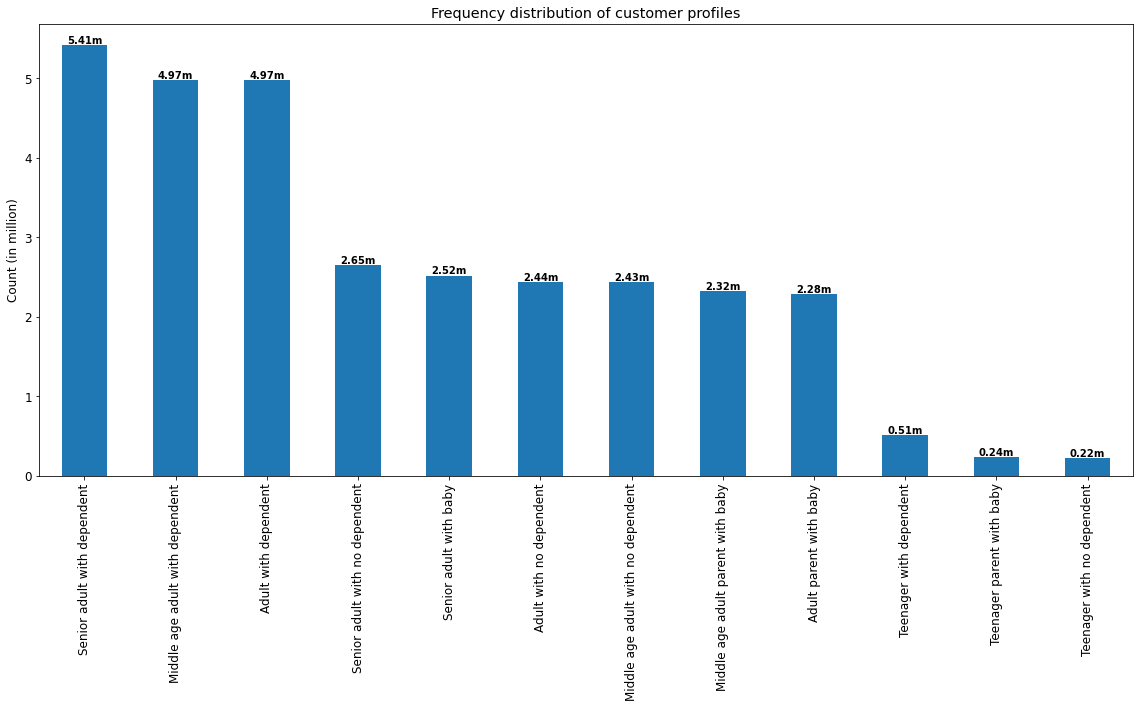

In [56]:
# creating a bar chart on frequency distribution of "combined_customer_profile"
bar_customer_profile = df_normal_activity['combined_customer_profile'].value_counts(dropna = False).apply(lambda x : x/1000000).plot.bar(title = 'Frequency distribution of customer profiles', ylabel = 'Count (in million)', figsize = (16,10))
for c in bar_customer_profile.containers :
    plt.bar_label(c, fmt = '%0.2fm', fontsize = 10, fontweight = 'bold')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()

In [57]:
# exporting visualization
bar_customer_profile.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 bar_customer_profiles_distribution.png'))

### Visualising the distribution of "preferred_period" flag

In [68]:
# creating a crosstab to find out number of unique "user_id" accross the "preferred_period" profiles
crosstab_preferred_period = pd.crosstab(index = df_normal_activity['region'], columns = df_normal_activity['preferred_period'], values = df_normal_activity['user_id'], aggfunc = pd.Series.nunique, dropna = False)

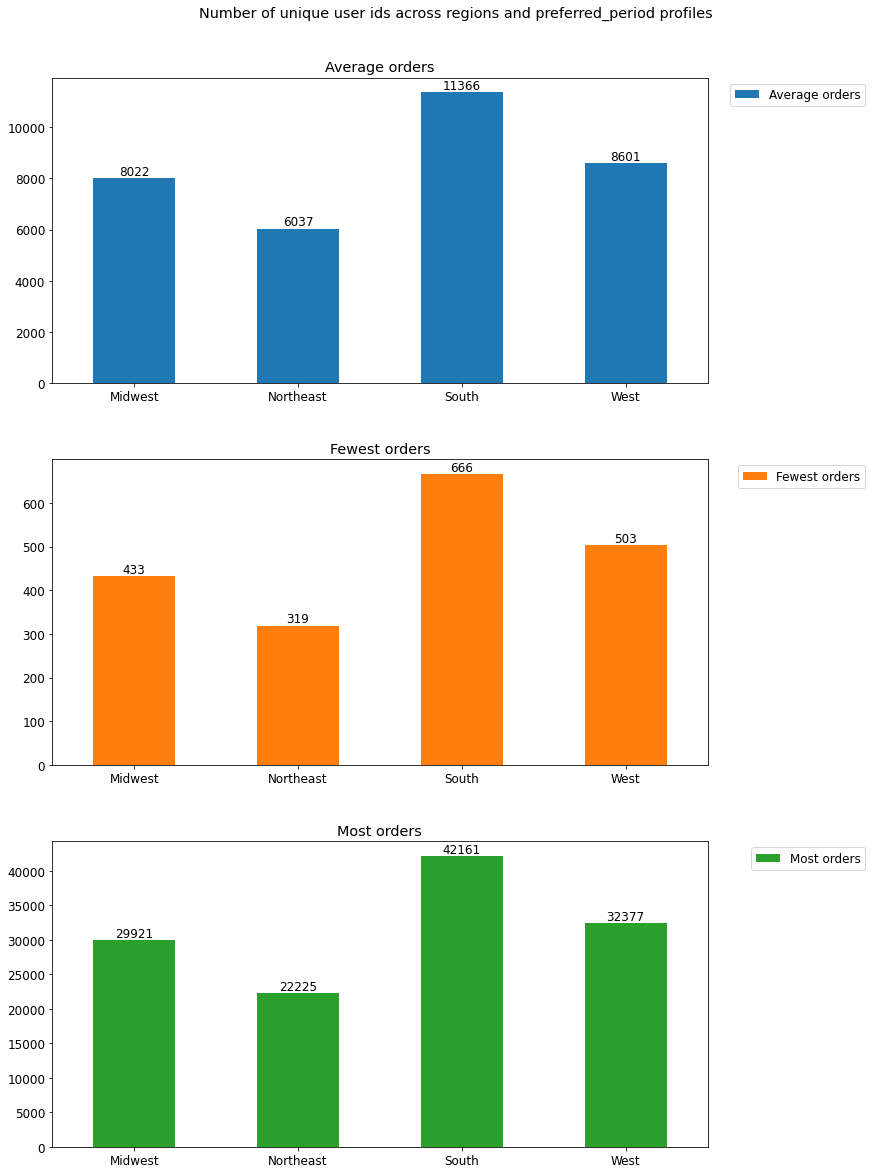

In [116]:
# creating a bar chart visualising the number of unique user_id accross "preferred_period" and "region" profiles 
bar_preferred_period = crosstab_preferred_period.plot(kind = 'bar', subplots = True, title = 'Number of unique user ids across regions and preferred_period profiles', xlabel = '', figsize = (14,18), sharex = False)
plt.legend(bbox_to_anchor = (0.9, 1.0))
for ax in plt.gcf().axes:
    ax.legend(bbox_to_anchor = (1.25,1.0))
    ax.tick_params('x', labelrotation = 0)
    for c in ax.containers :
        ax.bar_label(c, fmt = '%0.0f', fontsize = 12)
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.75, 
                    top=0.925, 
                    wspace=0.25, 
                    hspace=0.25)  
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 bar_preferred_period_distribution.png'))

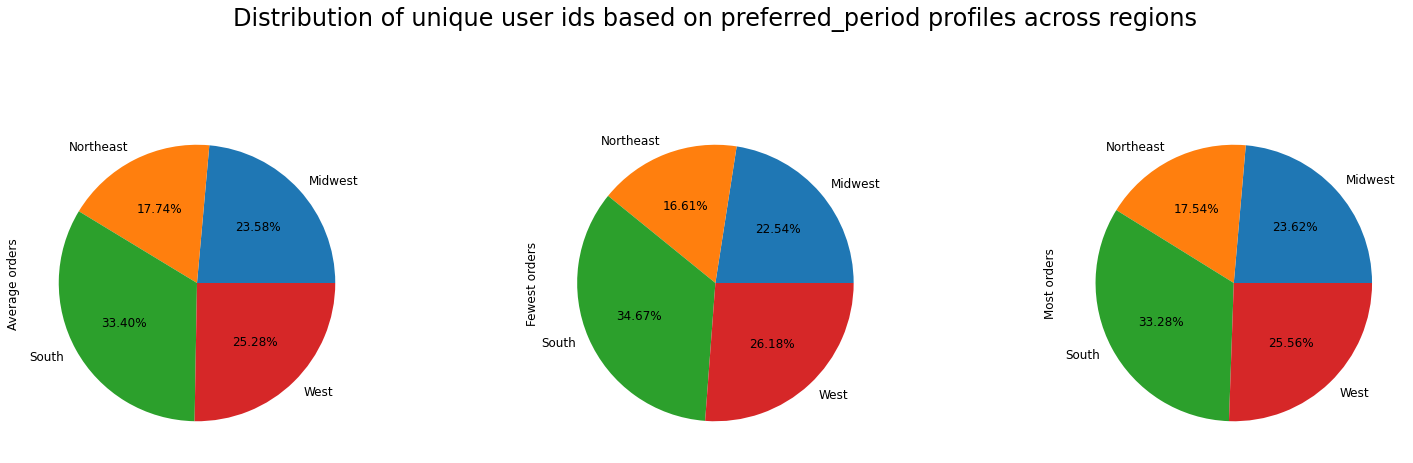

In [117]:
# creating a pie chart visualising the number of unique user_id accross "preferred_period" and "region" profiles 
pie_preferred_period = crosstab_preferred_period.plot(kind = 'pie', subplots = True, xlabel = '', figsize = (24,8), autopct = '%0.2f%%', legend = None)
plt.gcf().suptitle('Distribution of unique user ids based on preferred_period profiles across regions',fontsize = 24)
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 pie_preferred_period_distribution.png'))

### Visualising dsitribution "preferred_day" profiles accross regions

In [71]:
# creating a crosstab with relevant variables
crosstab_preferred_day = pd.crosstab(index = df_normal_activity['region'], columns = df_normal_activity['preferred_day'], values = df_normal_activity['user_id'], aggfunc = pd.Series.nunique, dropna = False)

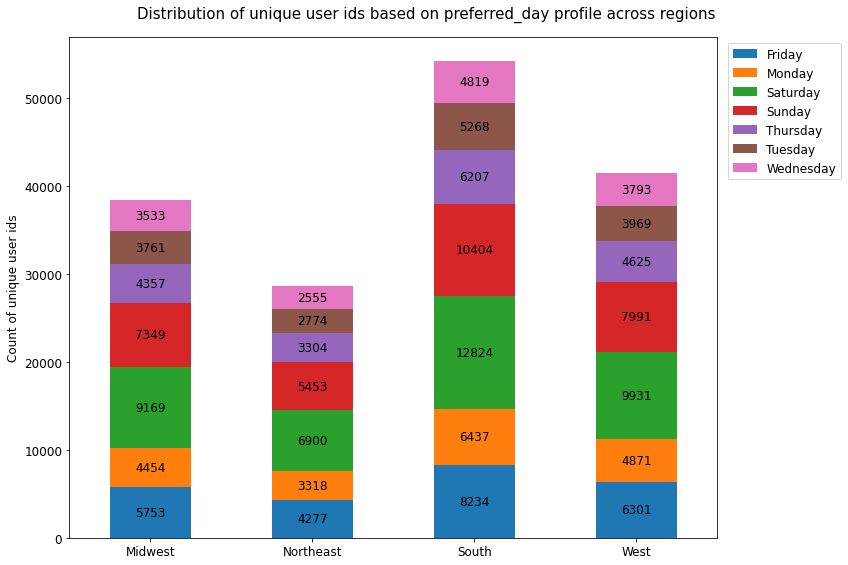

In [120]:
# creating bar charts visualizing the distribution of unique user ids based on 'preferred_day' profile across regions
bar_preferred_day = crosstab_preferred_day.plot(kind = 'bar', stacked = True, xlabel = '', ylabel = 'Count of unique user ids', figsize = (12,8))
plt.gcf().suptitle('Distribution of unique user ids based on preferred_day profile across regions', fontsize = 15)
plt.legend(bbox_to_anchor = (1.2,1.0))
plt.tick_params('x', labelrotation = 0)
for c in bar_preferred_day.containers :
    plt.bar_label(c, label_type = 'center', fmt = '%0.0f')
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 bar_preferred_day_distribution.png'))

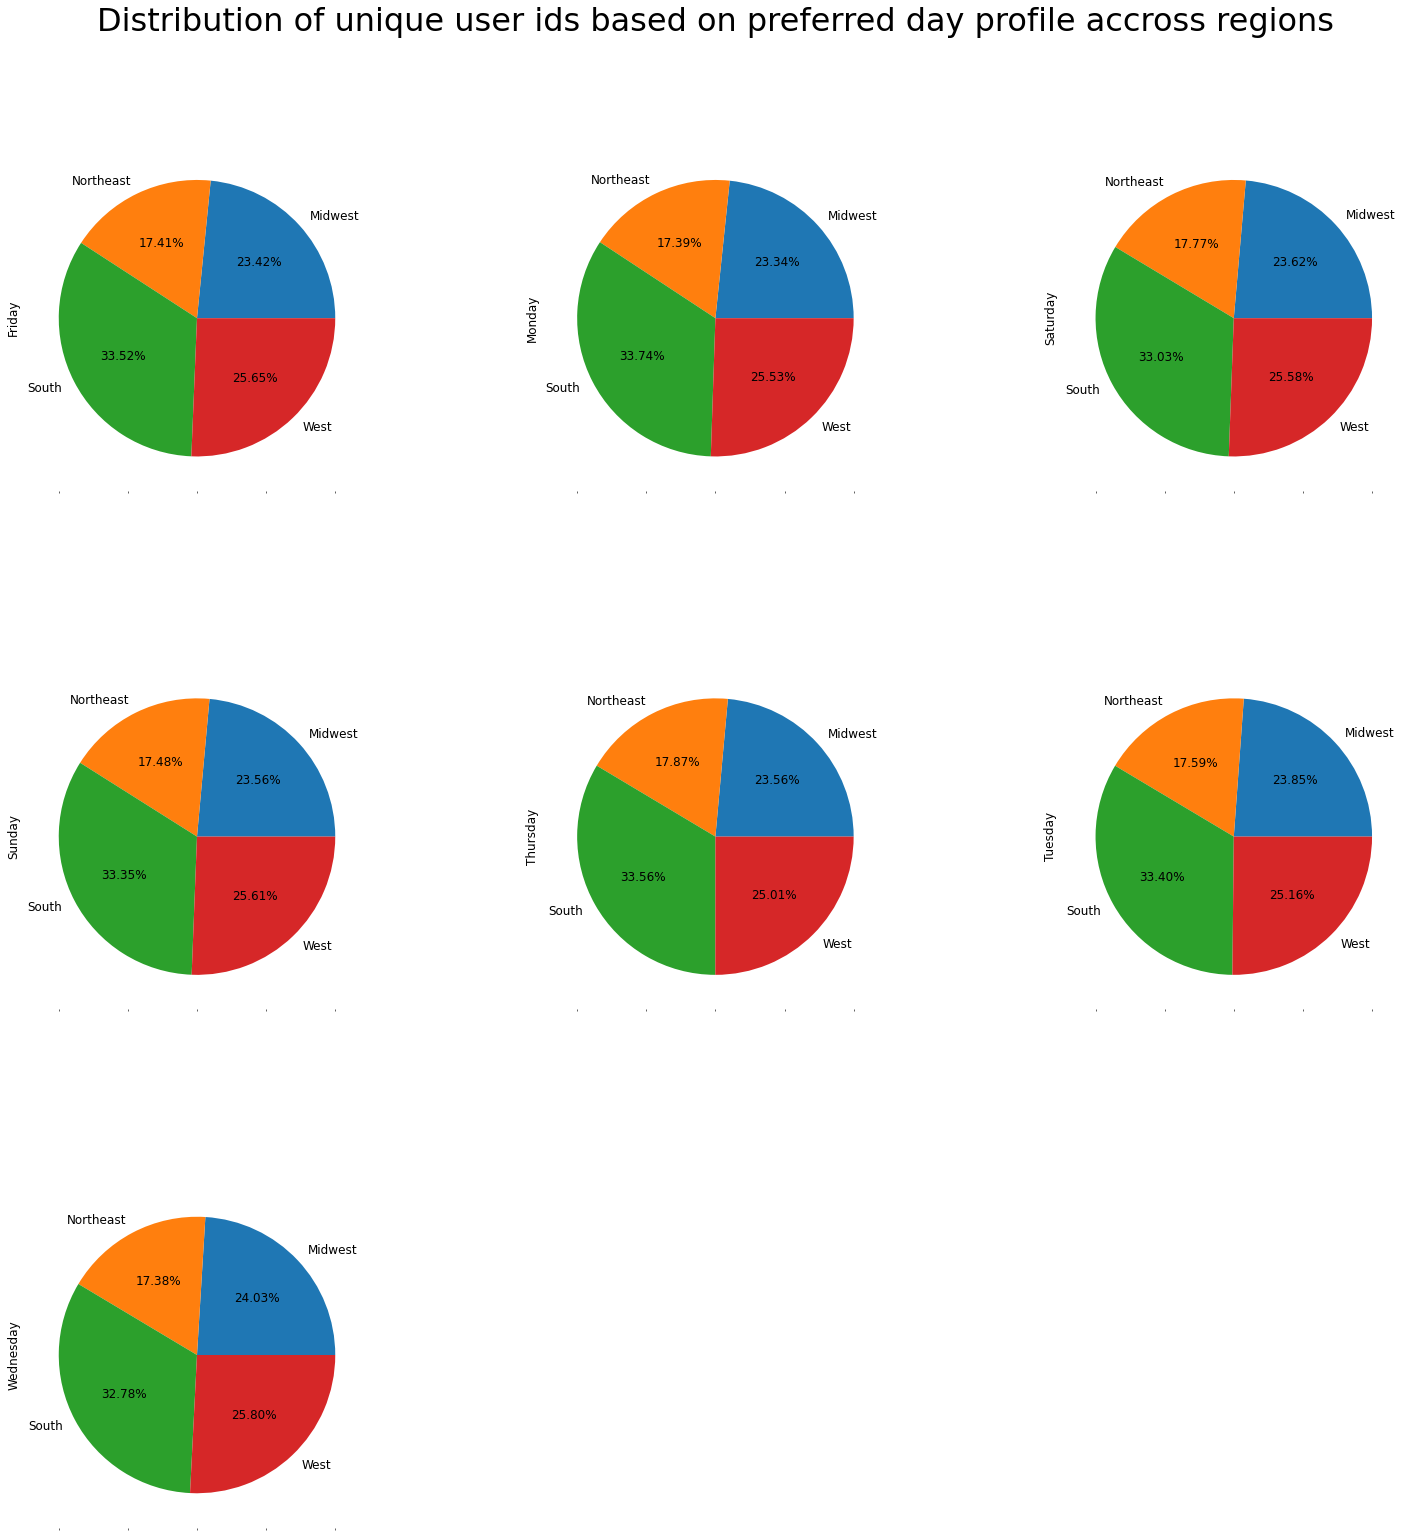

In [121]:
# creating pie charts visualizing the distribution of unique user ids based on 'preferred_day' profile across regions
pie_preferred_day = crosstab_preferred_day.plot(kind = 'pie', subplots = True, layout = (3,3), legend = None, autopct = '%0.2f%%', figsize = (24,24))
plt.gcf().suptitle('Distribution of unique user ids based on preferred day profile accross regions',fontsize=32)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 pie_preferred_day_distribution.png'))

## Aggregating "max", "mean", "min" on "days_since_prior_order" and "prices" while grouping by "customer_profile" column

In [52]:
# aggregating "max", "mean", "min" on "days_since_prior_order" column while grouping by "customer_profile" column
df_normal_activity.groupby('combined_customer_profile').agg({'days_since_prior_order' : ['max', 'mean', 'min']})

days_since_prior_order                
                                                      max       mean  min
combined_customer_profile                                                
Adult parent with baby                               30.0   9.332127  0.0
Adult with dependent                                 30.0  11.467461  0.0
Adult with no dependent                              30.0  10.873888  0.0
Middle age adult parent with baby                    30.0   9.396758  0.0
Middle age adult with dependent                      30.0  11.544464  0.0
Middle age adult with no dependent                   30.0  10.723006  0.0
Senior adult with baby                               30.0   9.404115  0.0
Senior adult with dependent                          30.0  11.488081  0.0
Senior adult with no dependent                       30.0  10.750328  0.0
Teenager parent with baby                            30.0   9.335804  0.0
Teenager with dependent                              30.0  11.414090  0.0
Teenager with no dependent                           30.0  11.141716  0.0

In [53]:
# aggregating "max", "mean", "min" on "prices" column while grouping by "customer_profile" column
df_normal_activity.groupby('combined_customer_profile').agg({'prices' : ['max', 'mean', 'min']})

prices               
                                      max      mean  min
combined_customer_profile                               
Adult parent with baby               25.0  7.825263  1.0
Adult with dependent                 25.0  7.763584  1.0
Adult with no dependent              25.0  7.781576  1.0
Middle age adult parent with baby    25.0  7.835727  1.0
Middle age adult with dependent      25.0  7.772577  1.0
Middle age adult with no dependent   25.0  7.788593  1.0
Senior adult with baby               25.0  7.830854  1.0
Senior adult with dependent          25.0  7.776264  1.0
Senior adult with no dependent       25.0  7.801014  1.0
Teenager parent with baby            25.0  7.896660  1.0
Teenager with dependent              25.0  7.789132  1.0
Teenager with no dependent           25.0  7.751409  1.0

## Comparing customer profiles among regions

### Comparing "age_group" profiles accross regions

In [122]:
# creating crosstab with "region" and "age_group"
crosstab_region = pd.crosstab(index = df_normal_activity['region'], columns = df_normal_activity['age_group'], values = df_normal_activity['prices'], aggfunc = sum, dropna = False).apply(lambda x : x/1000000)

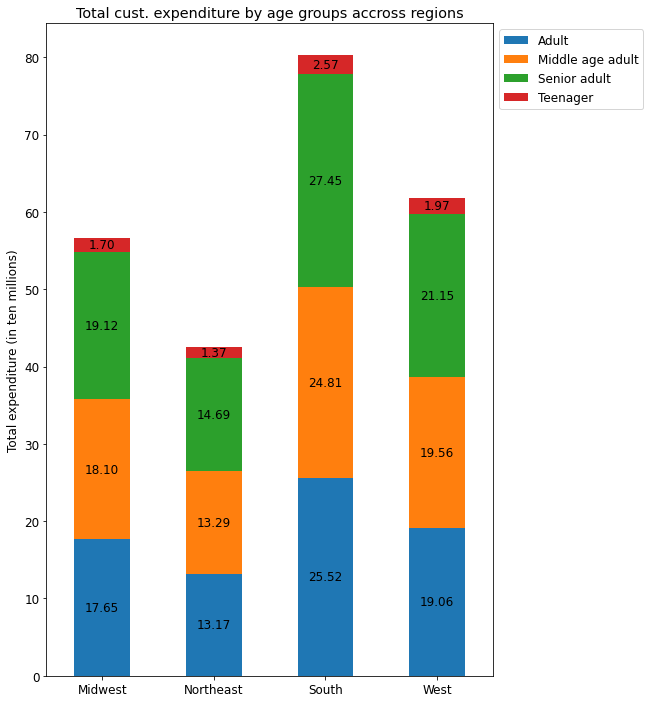

In [123]:
# visualizing total customer expenditure by age group accross regions
bar_region_age_group = crosstab_region.plot(kind = 'bar', stacked = True, title = 'Total cust. expenditure by age groups accross regions', xlabel = '', ylabel = 'Total expenditure (in ten millions)', figsize = (8,12))
plt. legend(bbox_to_anchor = (1.35,1))
for c in bar_region_age_group.containers :
    plt.bar_label(c, label_type = 'center', fmt = '%0.2f')
plt.tick_params('x', labelrotation = 0)
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 bar_region_age_group.png'))
# plt.ticklabel_format(style = 'plain', axis = 'y') to be used to display ticks without scientific notation

### Comparing "babies_flag" profile accross regions

In [59]:
# crosstab with relevant comumns
crosstab_region_babies = pd.crosstab(index = df_normal_activity['region'], columns = df_normal_activity['babies_flag'], values = df_normal_activity['prices'], aggfunc = 'sum').apply(lambda x : x/1000000, axis = 1)

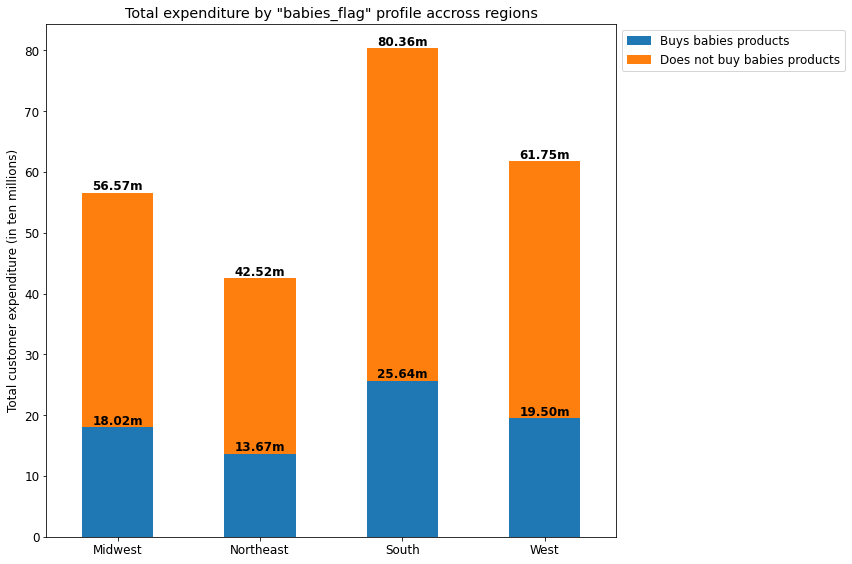

In [62]:
# visualising total expenditure by "babies_flag" profile
bar_region_babies = crosstab_region_babies.plot(kind = 'bar', stacked = True, title = 'Total expenditure by "babies_flag" profile accross regions', xlabel = '', ylabel = 'Total customer expenditure (in ten millions)', figsize = (12, 8))                                         
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.tick_params('x', labelrotation = 0)
for c in bar_region_babies.containers :
    plt.bar_label(c, fmt = '%0.2fm', fontweight = 'bold')
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 bar_region_babies.png'))

### Comparing "dependent_flag" profiles accross regions

In [105]:
# creating a crosstab with relevant data
crosstab_dependent = pd.crosstab(index = df_normal_activity['region'], columns = df_normal_activity['dependent_flag'], values = df_normal_activity['prices'], aggfunc = sum, dropna = False).apply(lambda x : x/1000000)

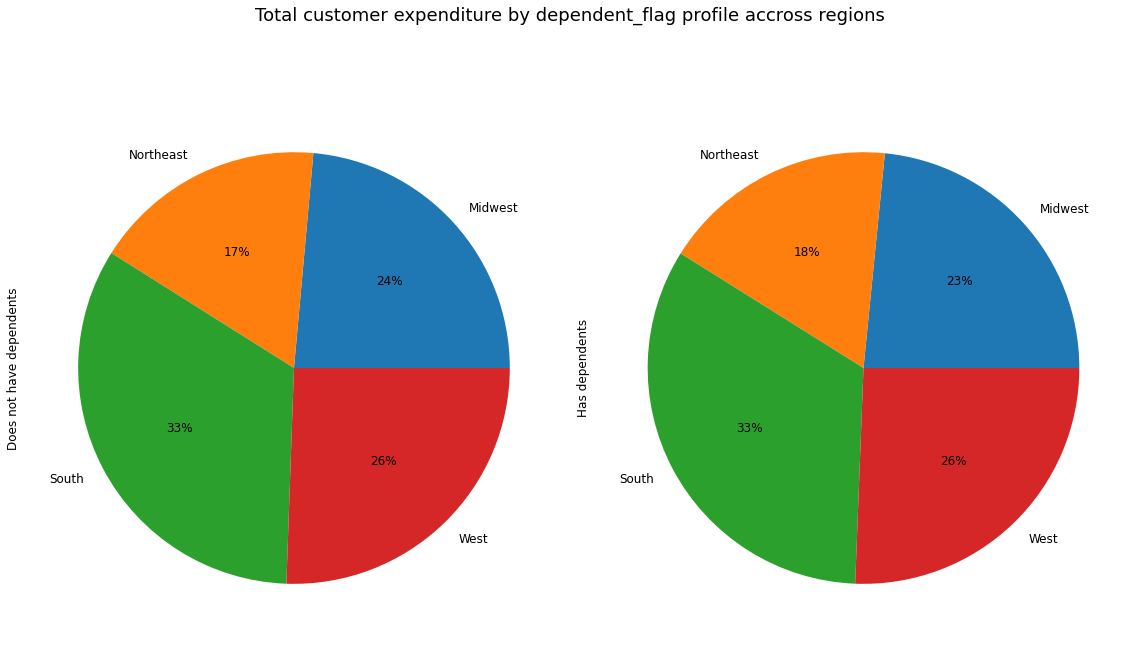

In [111]:
# ceating pie chart comparing total customer expenditure by "dependent_flag" profiles accross regions
pie_dependent_region = crosstab_dependent.plot(kind = 'pie', subplots = True, autopct = '%0.0f%%', legend = None, figsize = (16,10))
plt.gcf().suptitle('Total customer expenditure by dependent_flag profile accross regions', fontsize = 18)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 pie_dependent_region.png'))

### Comparing "income_range" profiles accross gerions based on customer expenditure

In [128]:
# creating crosstab
crosstab_income_range = pd.crosstab(index = df_normal_activity['region'], columns = df_normal_activity['income_range'], values = df_normal_activity['prices'], aggfunc = sum, dropna = False).apply(lambda x : x/1000000)

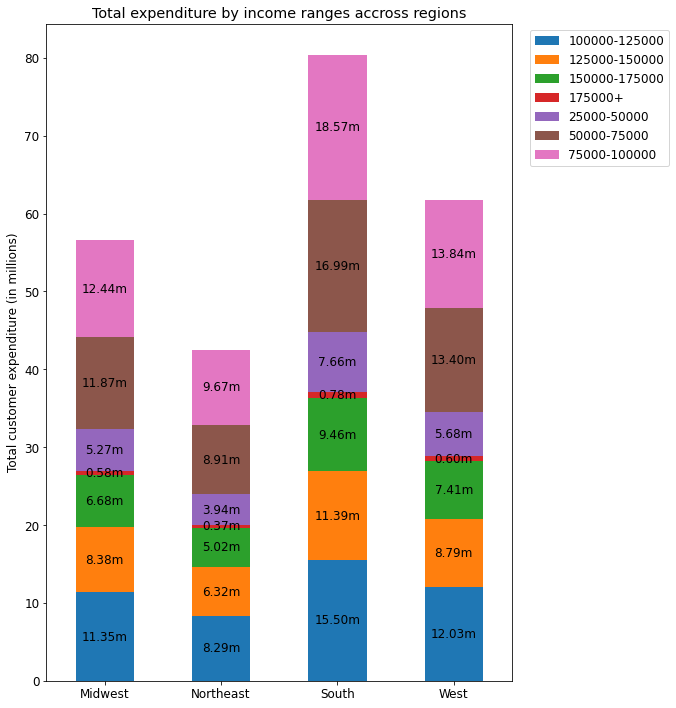

In [130]:
# creating bar chart visualizing total expenditure by income ranges accross regions
bar_income_range_2 = crosstab_income_range.plot(kind = 'bar', stacked = True, title = 'Total expenditure by income ranges accross regions', xlabel ='' , ylabel = 'Total customer expenditure (in millions)', figsize = (10,10))
for c in bar_income_range_2.containers :
    plt.bar_label(c, label_type = 'center', fmt = '%0.2fm')
plt.legend(bbox_to_anchor = (1.35, 1.0))
plt.tick_params('x', labelrotation = 0)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 bar_region_age_group.png'))

### Comparing "combined_customer_profile" profiles accross regions based expenditure and on usage frequency

In [113]:
# creating new dataframe with relevant columns and aggregations
df_cust_prof = df_normal_activity.groupby(['region', 'combined_customer_profile']).agg({'prices' : ['sum'], 'median_of_days_since_prior_order' : ['mean']}).reset_index()
df_cust_prof = df_cust_prof.droplevel(1, axis = 1)
df_cust_prof['prices'] = df_cust_prof['prices'].apply(lambda x : x/1000000)

In [114]:
# checking new dataframe
df_cust_prof

,region,combined_customer_profile,prices,median_of_days_since_prior_order
0,Midwest,Adult parent with baby,4.114214,8.353247
1,Midwest,Adult with dependent,9.089424,10.681028
2,Midwest,Adult with no dependent,4.442810,9.920343
3,Midwest,Middle age adult parent with baby,4.294211,8.364506
4,Midwest,Middle age adult with dependent,9.213275,10.819145
5,Midwest,Middle age adult with no dependent,4.596539,9.681606
6,Midwest,Senior adult with baby,4.534719,8.523395
7,Midwest,Senior adult with dependent,9.783499,10.859054
8,Midwest,Senior adult with no dependent,4.804311,10.024374
9,Midwest,Teenager parent with baby,0.417534,7.924005


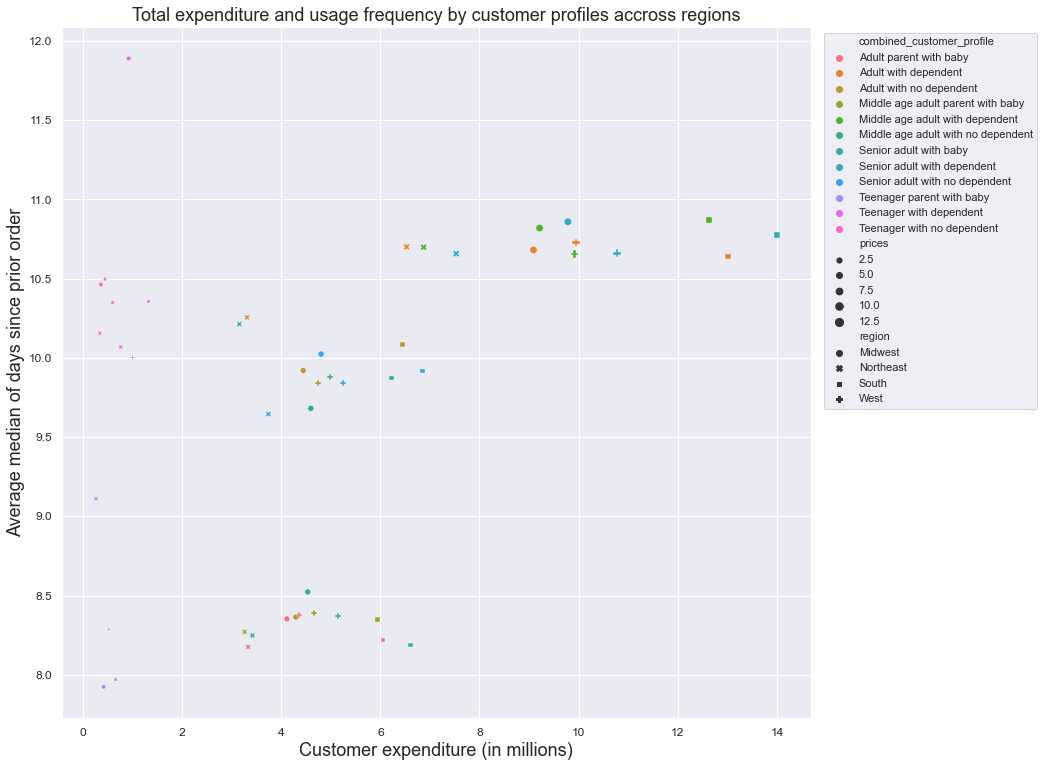

In [118]:
# creating scatter plot visualizing the difference in total expenditure and usage frequency by combined customer profiles accross region
scatter_cust_prof = sns.scatterplot(data = df_cust_prof, x = 'prices', y = 'median_of_days_since_prior_order', size = 'prices', hue = 'combined_customer_profile', style = 'region')
scatter_cust_prof.legend(bbox_to_anchor = (1.01,1))
scatter_cust_prof.set_title('Total expenditure and usage frequency by customer profiles accross regions', fontsize = 18, loc = "center")
scatter_cust_prof.set_ylabel('Average median of days since prior order', fontsize = 18)
scatter_cust_prof.set_xlabel('Customer expenditure (in millions)', fontsize = 18)
scatter_cust_prof.tick_params(labelsize = 12)
sns.set(rc={'figure.figsize':(16,12)})
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.75, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)
scatter_cust_prof.figure.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 scatter_cust_prof.png'))

## Comparing customer profiles with departments

### Visualizing revenue by department accross hours

In [60]:
# creating crosstab with relevant columns
crosstab_time_department = pd.crosstab(index = df_normal_activity['order_time_24h_format'], columns = df_normal_activity['name_of_goods'], values = df_normal_activity['prices'], aggfunc = sum, dropna = False).apply(lambda x : x/1000000)

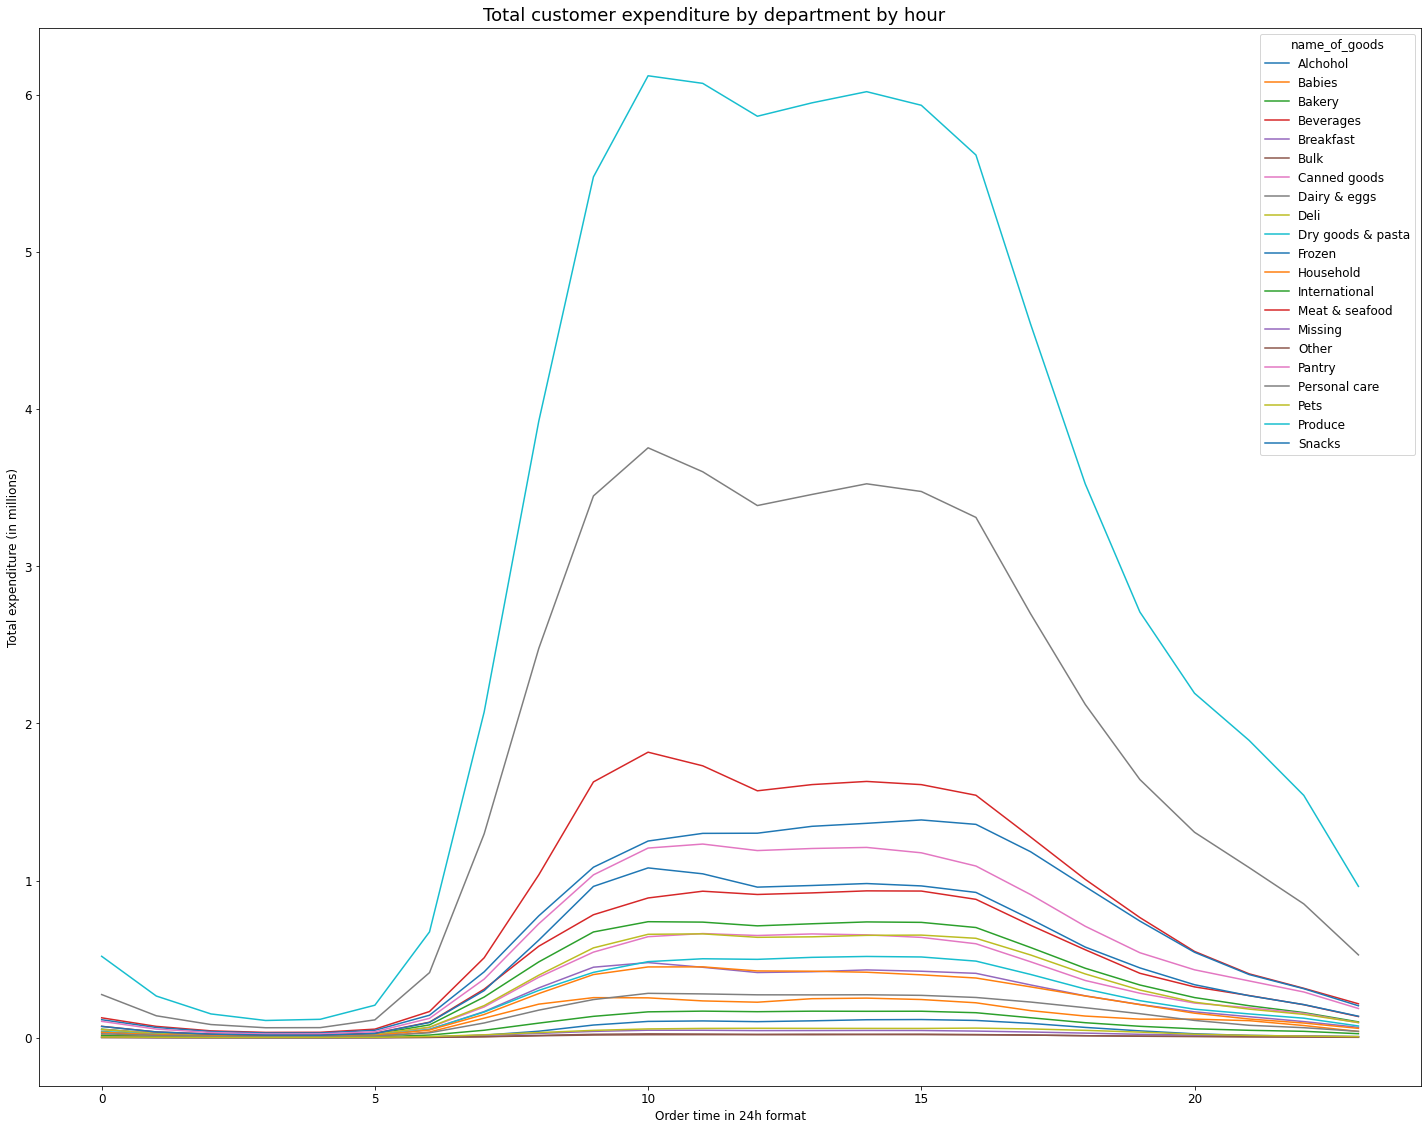

In [86]:
# creating line plot visualizing customer expenditure by departments over the hours of a day
line_time_dept = crosstab_time_department.plot(kind = 'line', ylabel = 'Total expenditure (in millions)', xlabel = 'Order time in 24h format', figsize = (20,16))
plt.gcf().suptitle('Total customer expenditure by department by hour', fontsize = 18)
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 line_time_dept.png'))

### Visualizing total expenditure by combined customer profile by department

In [88]:
# creating crosstab with relevant columns while aggregating "prices" column
crosstab_dept_cust_prof = pd.crosstab(index = df_normal_activity['name_of_goods'], columns = df_normal_activity['combined_customer_profile'], values = df_normal_activity['prices'], aggfunc = sum, dropna = False).apply(lambda x: x/1000000)

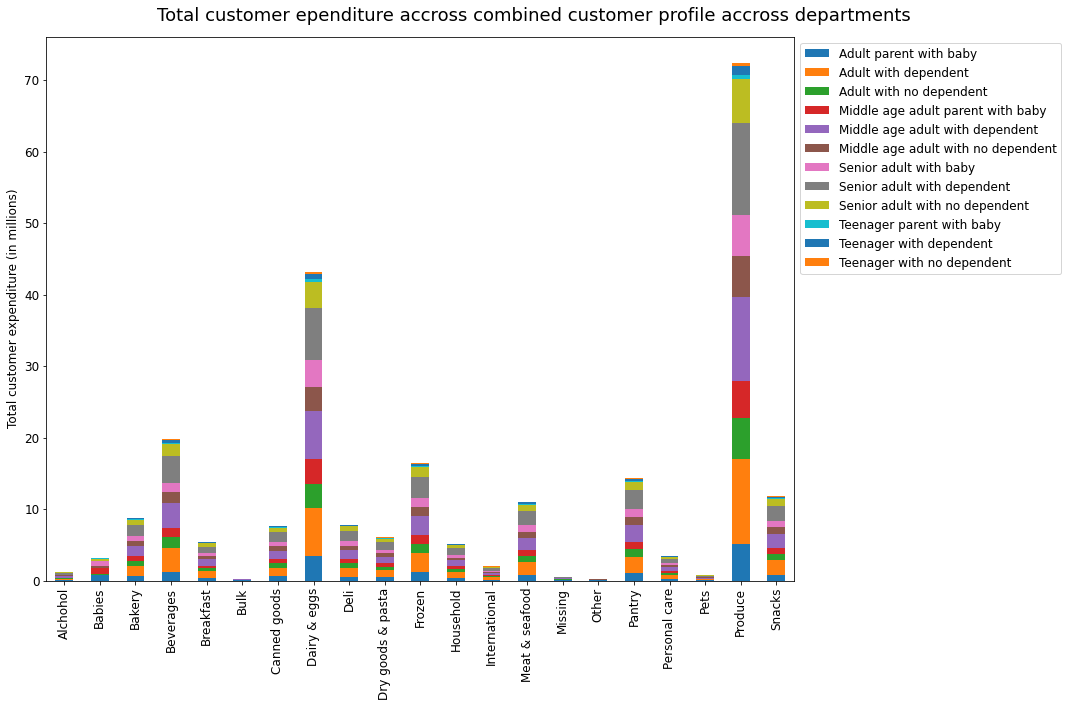

In [97]:
# creating a bar chart visualizing customer expenditure by combined customer profiles accross departments
bar_dept_prof = crosstab_dept_cust_prof.plot(kind = 'bar', stacked = True, ylabel = 'Total customer expenditure (in millions)', xlabel = '', figsize = (15,10))
plt.legend(bbox_to_anchor = (1.0,1.0))
plt.gcf().suptitle('Total customer ependiture accross combined customer profile accross departments', fontsize = 18)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 bar_dept_prof.png'))

### Visualizing total expenditure by income range profile by department

In [98]:
# creating crosstab with relevant columns while aggregating "prices" column
crosstab_dept_income = pd.crosstab(index = df_normal_activity['name_of_goods'], columns = df_normal_activity['income_range'], values = df_normal_activity['prices'], aggfunc = sum, dropna = False).apply(lambda x: x/1000000)

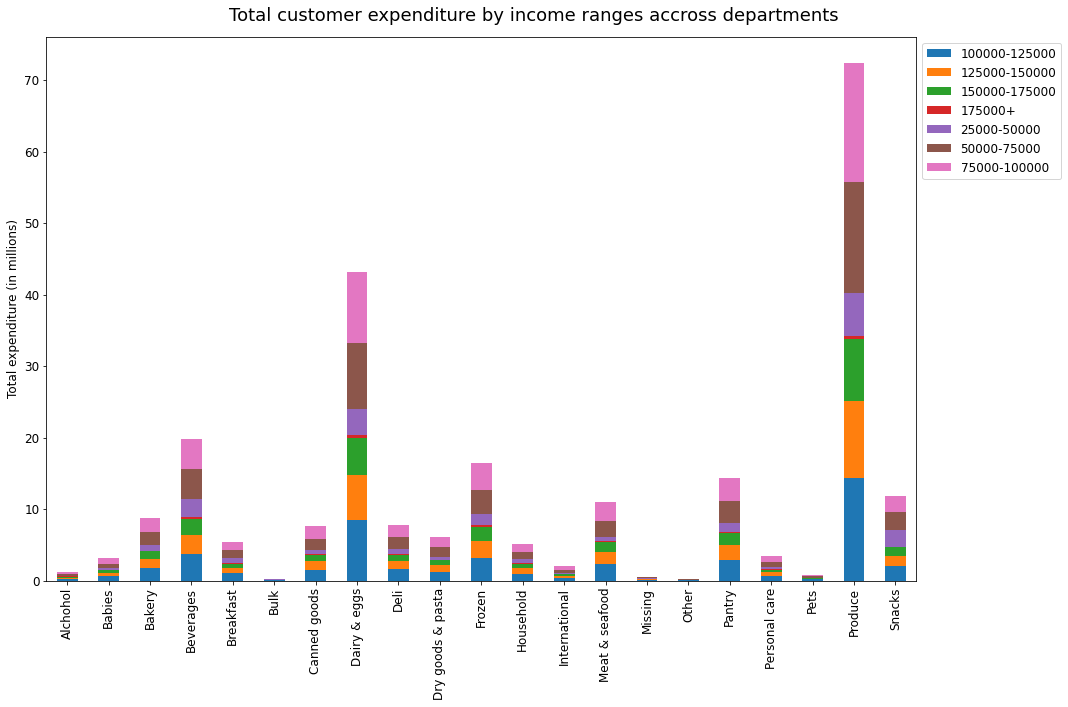

In [102]:
# visualising total expenditure by income ranges across departments
bar_dept_income = crosstab_dept_income.plot(kind = 'bar', stacked = True, xlabel = '', ylabel = 'Total expenditure (in millions)', figsize = (15,10))
plt.legend(bbox_to_anchor = (1.0,1.0))
plt.gcf().suptitle('Total customer expenditure by income ranges accross departments', fontsize = 18)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 Bar_dept_income_range.png'))

## Exporting final dataframe

In [103]:
# exporting dataframe to pickle format
df_normal_activity.to_pickle(os.path.join(path, '2. Data', 'Prepared Data', '4.10_final_dataframe.pkl'))